In [ ]:
from google.colab import files
Uploaded = files.upload()

Saving Bank_Trust_Dataset.csv to Bank_Trust_Dataset.csv


In [ ]:
import io

Import the necessary libraries and settings

- Pandas and Numpy: For data loading, cleaning and numerical operations.
- Seaborn and Matplotlip: For data visualisation and exploring patterns.
- datetime: For handling and manipulating date related fields.
- warnings: To suppress unnecessary warning messages for cleaner outputs.
- StandartScaler: To normalize numeric features before clustering.
- KMeans: The clustering algorithm used for segementing the data.
- silhouette_score: To evaluate the quality of the clustering results.
- plt.style.use, sns.set_palette: To improve the aesthetics of the plots.


In [ ]:
#import libraries and load data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

# set style to imporve visualization
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

Loading the dataset

This step involves reading the customer transaction data from the specified file path using pandas and reads the first few rows to verify the dataset is loaded correctly.



In [ ]:
customer_transaction_df = pd.read_csv(io.BytesIO(Uploaded['Bank_Trust_Dataset.csv']))
customer_transaction_df.head()

,TransactionID,CustomerID,TransactionDate,TransactionTime,TransactionAmount,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,T9105905,C1419610,2021-06-18,74921,177.72,1991-08-13,F,East Gordonside,29923.49
1,T3229540,C1419610,2021-07-16,145601,304.89,1991-08-13,F,East Gordonside,29618.60
2,T5116286,C1419610,2021-01-14,113217,79.68,1991-08-13,F,East Gordonside,29538.92
3,T4475301,C5614226,2020-04-03,72506,3685.28,1956-09-29,M,Donaldfort,62152.00
4,T2953823,C5614226,2020-12-15,143619,5452.50,1956-09-29,M,Donaldfort,56699.50


In [ ]:
#creating extra copies of dataset and assigning to new dataframeo

DataFrame = customer_transaction_df.copy()
df = DataFrame.copy()

**Phase 1: Exploratory Data Analysis**

**Basic info**

This code performs a quick exploratory check of the dataset. It displays the dataset’s shape to show how many rows and columns it has, identifies the data types of each column to understand their structure, checks for missing values to highlight potential data quality issues, and provides basic statistical summaries to reveal patterns, ranges, and possible outliers. Overall, it gives a concise overview of the dataset’s structure and quality before deeper analysis.


In [ ]:
print('Shape of dataset:', df.shape)
print('\nData Types:')
print(df.dtypes)
print('\nNumber of missing values:')
print(df.isnull().sum())
print('\nNumerical statistics of dateset:')
print(df.describe())

Shape of dataset: (947917, 9)

Data Types:
TransactionID          object
CustomerID             object
TransactionDate        object
TransactionTime         int64
TransactionAmount     float64
CustomerDOB            object
CustGender             object
CustLocation           object
CustAccountBalance    float64
dtype: object

Number of missing values:
TransactionID         0
CustomerID            0
TransactionDate       0
TransactionTime       0
TransactionAmount     0
CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
dtype: int64

Numerical statistics of dateset:
       TransactionTime  TransactionAmount  CustAccountBalance
count    947917.000000      947917.000000       947917.000000
mean     117862.497794        1575.545842        25664.142689
std       69295.879093        2670.821963        36565.245859
min           0.000000           1.000000            0.000000
25%       55820.000000          44.830000         2760.070000
50%      11

**Checking for duplicates**

This code checks the dataset’s integrity and consistency. It first identifies duplicate records overall and within the TransactionID column to ensure each transaction is unique. It then counts how many unique customers exist and shows the distribution of customer gender for demographic insight. Finally, it examines the range of birth dates to detect any invalid or unrealistic dates, helping validate data accuracy and reliability.




In [ ]:
#Checking for duplicates
print('Number of duplicated transactions: ',df.duplicated().sum())
print('Number of duplicated transaction IDs: ', df['TransactionID'].duplicated().sum())

#Checking for consistency
print('\nTotal number of unique customers:  ', df['CustomerID'].nunique())
print('\nGender distribution: ')
print(df['CustGender'].value_counts())

#Checking dates for correctness
print('\nEarliest DOB: ', df['CustomerDOB'].min())
print('Latest DOB: ', df['CustomerDOB'].max())
print('\nEarliest Transaction date: ', df['TransactionDate'].min())
print('Latest Transaction date: ', df['TransactionDate'].max())


Number of duplicated transactions:  0
Number of duplicated transaction IDs:  48431

Total number of unique customers:   82000

Gender distribution: 
CustGender
M    474360
F    473557
Name: count, dtype: int64

Earliest DOB:  1944-10-24
Latest DOB:  2007-10-22

Earliest Transaction date:  2020-01-01
Latest Transaction date:  2022-12-31


In [ ]:
#removing duplicated items in transactionid
df= df.drop_duplicates(subset=['TransactionID'])

In [ ]:
#Sanity check
print('Number of Duplicated transactions: ',df.duplicated().sum())
print('Number of duplicated transaction Ids: ', df['TransactionID'].duplicated().sum())

Number of Duplicated transactions:  0
Number of duplicated transaction Ids:  0


**Dataset Overview**

This code provides a concise overview of the dataset showing the shape (row and column) of the dateset, the number of unique customers and the date range the transactions cover. It also calculates the total transaction value indicating the sales volume and the average customer balance which gives insight into the customer's financial transactions and it's scale.

In [ ]:
#concise dataset overview
print('CONCISE DATASET OVERVIEW')
print('\nShape of dataset:', df.shape)
print('Total number of unique customers:  ', df['CustomerID'].nunique())
print(f"Date Range: {df['TransactionDate'].min()} to {df['TransactionDate'].max()}")
print(f"Total transaction value: {df['TransactionAmount'].sum():,.2f}")
print(f"Average customer account balance:  {df['CustAccountBalance'].mean():,.2f}")
#print('Average customer account balance: ', df['CustAccountBalance'].mean())

CONCISE DATASET OVERVIEW

Shape of dataset: (899486, 9)
Total number of unique customers:   81541
Date Range: 2020-01-01 to 2022-12-31
Total transaction value: 1,416,692,154.20
Average customer account balance:  25,653.16


**Basic dataset information**

This involves structured exploratory overview of the dataset showing:

**Data structure:** This involves using df.info to summarize the column names, data types and non-null counts. Also shows the first 10 rows of the dataset to preview sample entries.

**Basic statistics:** shows the descriptive statistics for key numerical columns such as TransactionAmount and CustAccountBalance exploring measures like mean, standard deviation and quartiles to understand value distributions.


**Missing values:** It goes further to check for missing values in each columns. This helps to identify data quality issues and informs any necessary cleaning or imputation steps.

In [ ]:
#Basic dataset information
print('Dataset Information')
print(df.info())
print('\nFirst 10 rows of the dataset')
display(df.head(10))

print('\nBasic Statistics')
print(df[['TransactionAmount', 'CustAccountBalance']].describe())

print('\nMISSING VALUES')
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
print(missing_df)

print(missing_df[missing_df['Missing Values'] > 0])

Dataset Information
<class 'pandas.core.frame.DataFrame'>
Index: 899486 entries, 0 to 947916
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TransactionID       899486 non-null  object 
 1   CustomerID          899486 non-null  object 
 2   TransactionDate     899486 non-null  object 
 3   TransactionTime     899486 non-null  int64  
 4   TransactionAmount   899486 non-null  float64
 5   CustomerDOB         899486 non-null  object 
 6   CustGender          899486 non-null  object 
 7   CustLocation        899486 non-null  object 
 8   CustAccountBalance  899486 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.6+ MB
None

First 10 rows of the dataset


,TransactionID,CustomerID,TransactionDate,TransactionTime,TransactionAmount,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,T9105905,C1419610,2021-06-18,74921,177.72,1991-08-13,F,East Gordonside,29923.49
1,T3229540,C1419610,2021-07-16,145601,304.89,1991-08-13,F,East Gordonside,29618.60
2,T5116286,C1419610,2021-01-14,113217,79.68,1991-08-13,F,East Gordonside,29538.92
3,T4475301,C5614226,2020-04-03,72506,3685.28,1956-09-29,M,Donaldfort,62152.00
4,T2953823,C5614226,2020-12-15,143619,5452.50,1956-09-29,M,Donaldfort,56699.50
5,T8158456,C5614226,2020-01-10,114835,7106.78,1956-09-29,M,Donaldfort,49592.72
6,T5402092,C5614226,2022-10-11,74538,4890.07,1956-09-29,M,Donaldfort,54482.79
7,T6234368,C5614226,2020-06-29,112742,5280.39,1956-09-29,M,Donaldfort,49202.40
8,T6072805,C5614226,2021-06-26,85357,6975.66,1956-09-29,M,Donaldfort,42226.74
9,T7427427,C5614226,2021-07-02,53145,6789.87,1956-09-29,M,Donaldfort,35436.87



Basic Statistics
       TransactionAmount  CustAccountBalance
count      899486.000000       899486.000000
mean         1575.001895        25653.156604
std          2670.259484        36549.245326
min             1.000000            0.000000
25%            44.810000         2762.537500
50%            66.320000        11662.610000
75%          3237.147500        33533.147500
max         22032.730000       456249.980000

MISSING VALUES
                    Missing Values  Percentage
TransactionID                    0         0.0
CustomerID                       0         0.0
TransactionDate                  0         0.0
TransactionTime                  0         0.0
TransactionAmount                0         0.0
CustomerDOB                      0         0.0
CustGender                       0         0.0
CustLocation                     0         0.0
CustAccountBalance               0         0.0
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


**In-depth Transaction Analysis**

This step performs a detailed transaction analysis to understand the financial behaviours in the dataset.
This starts with the summary of key transaction matrics including the total number of transactions in the dataset, total and average transaction amounts and identifying the maximum and minimum transaction recorded - this gives insight into the spending acitvity.

Then, these transactions were grouped into segments such as Micro (0-100), Small (101-500), Medium (501-1000), Large (1001-5000), Extra Large (5k+). This segmentation gives clearer insights into customer spending patterns and helps to identify the segment with most customer spending supporting deeper behavioural and financial segmentation analysis.



In [ ]:
print("\n=== TRANSACTION ANALYSIS ===")

#Analysis of the transaction amounts
print(f"No of transactions: {len(df):,}")
print(f"Total transaction amounts:  {df['TransactionAmount'].sum():,.2f}")
print(f"Average transaction amount: {df['TransactionAmount'].mean():,.2f}")
print(f"Maximum transaction amount: {df['TransactionAmount'].max():,.2f}")
print(f"Minimum transaction amount: {df['TransactionAmount'].min():,.2f}")

#Transaction amount segments
amount_bins = [0, 100, 500, 1000, 5000, float('inf')]
amount_labels = ['Micro (0-100)', 'Small (101-500)', 'Medium (501-1000)', 'Large (1001-5000)', 'Extra Large (5k+)']
df['AmountSegment'] = pd.cut(df['TransactionAmount'], bins=amount_bins, labels=amount_labels)

amount_segment_counts = df['AmountSegment'].value_counts().sort_index()
print('\nTransaction Amount Segments:')
print(amount_segment_counts)


=== TRANSACTION ANALYSIS ===
No of transactions: 899,486
Total transaction amounts:  1,416,692,154.20
Average transaction amount: 1,575.00
Maximum transaction amount: 22,032.73
Minimum transaction amount: 1.00

Transaction Amount Segments:
AmountSegment
Micro (0-100)        566961
Small (101-500)       79936
Medium (501-1000)       591
Large (1001-5000)    115840
Extra Large (5k+)    136158
Name: count, dtype: int64


In [ ]:
#Trying to segment transaction dates to see which date range more transactions take place

print(f"Date Range: {df['TransactionDate'].min()} to {df['TransactionDate'].max()}")
date_bins = ['2020-01-01','2021-12-31','2022-01-01','2023-01-01']
date_labels = ['2020', '2021', '2022', '2023']
#df['date_segment'] = pd.cut(df['TransactionDate'], bins = date_bins, labels = date_labels)
#date_segment_counts = df['date_segment'].value_counts().sort_index()

Date Range: 2020-01-01 to 2022-12-31


**Top 10 Customers by Transaction Amount**

This step involves identifying top 10 customers based on their total transaction amounts. This gives insights into high value customers who contribute to overall revenue.

Firstly, the code aggregates the key metrics per customer including, the total amount spent, number of transactions, average transaction value, most recent account balance, gender and location. These aggregated statistics offer a detailed customer-level financial profile and this is sorted to show the top 10 highest spenders which highlights the most valuable customers.

For visualization, 2 side-by-side bar charts are generated. The first chart highlights the top 10 customers by total transaction amount, illustrating spending concentration among high-value customers. The second chart displays the top 10 customers by transaction count, revealing those with the most frequest activity. The visualizations shows customer segmentation and strategic decision-making, identifying both high-spending and high-engagement customers for potential loyalty programs, targeted marketing or premium service offerings.




 TOP 10 CUSTOMERS BY TOTAL TRANSACTION AMOUNT 
Top 10 customers by total transaction amount:


,Total_Amount,Transaction_count,Average_Amount,Last_Balance,Gender,Location
CustomerID,,,,,,
C4616926,230287.98,44,5233.82,0.00,F,Lake Williamside
C4510031,202168.38,38,5320.22,0.00,M,East Kevin
C2162054,202143.59,35,5775.53,0.00,M,Port Terryville
C4986191,191194.21,42,4552.24,0.00,F,Bretthaven
C4626616,175436.51,34,5159.90,10675.14,F,Lisaburgh
C1906432,172851.89,36,4801.44,0.00,M,Rosstown
C6585409,160858.58,33,4874.50,18547.11,F,West Jayne
C2409527,148383.80,29,5116.68,0.00,M,Mauriceside
C5779944,146148.29,31,4714.46,7481.76,F,Port Jasonhaven


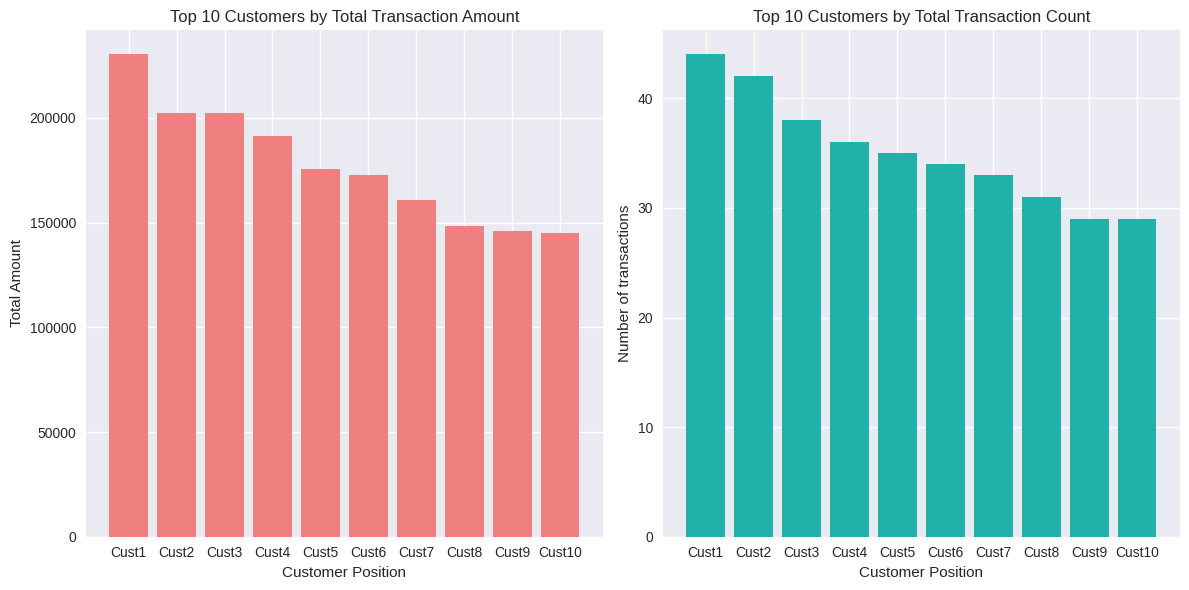

In [ ]:
print("\n TOP 10 CUSTOMERS BY TOTAL TRANSACTION AMOUNT ")
top_customers = df.groupby('CustomerID').agg({
    'TransactionAmount': ['sum', 'count', 'mean'],
    'CustAccountBalance': 'last',
    'CustGender': 'first',
    'CustLocation': 'first'
}).round(2)


top_customers.columns = ['Total_Amount', 'Transaction_count', 'Average_Amount', 'Last_Balance', 'Gender', 'Location']
top_customers = top_customers.sort_values(by='Total_Amount', ascending=False).head(10)

print("Top 10 customers by total transaction amount:")
display(top_customers)


#Visualisation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_10_amount = top_customers.head(10)
plt.bar(range(10),top_10_amount['Total_Amount'], color ='lightcoral')
plt.xlabel('Customer Position')
plt.ylabel('Total Amount')
plt.title('Top 10 Customers by Total Transaction Amount')
plt.xticks(range(10), [f'Cust{i+1}' for i in range(10)])

plt.subplot(1, 2, 2)
top_10_count = top_customers.sort_values(by='Transaction_count', ascending=False).head(10)
plt.bar(range(10),top_10_count['Transaction_count'], color ='lightseagreen')
plt.xlabel('Customer Position')
plt.ylabel('Number of transactions')
plt.title('Top 10 Customers by Total Transaction Count')
plt.xticks(range(10), [f'Cust{i+1}' for i in range(10)])

plt.tight_layout()
plt.show()

**Gender Distribution Analysis**

This section conducts a **Gender Distribution Analysis** to examine how customer gender influences financial behaviour and transaction patterns within the dataset.

The summary table presents aggregated metrics for each gender, including the **number of unique customers, total transaction amount, average transaction amount, transaction count,** and **average account balance**. This provides a quantitative overview of gender-based participation and spending tendencies.

The visualisations complement the statistical summary by depicting three key perspectives:
- A **pie chart** showing the proportion of male and female customers, offering a quick view of demographic distribution.

-A **bar chart** illustrating the total transaction amount by gender, highlighting which gender contributes more to overall spending.

-Another **bar chart** comparing average account balances by gender, revealing differences in financial standing or saving behaviour.

Together, these analyses deliver actionable insights into customer segmentation by gender, which can guide **targeted marketing, financial product personalisation,** and **customer engagement strategies** based on demographic dynamics.




=== GENDER DISTRIBUTION ANALYSIS ===


,Unique_CustomerID,Total_Amount,Average_Amount,Transaction_Count,Average_Balance
CustGender,,,,,
F,40735,7.010943e+08,1560.61,449245,25792.69
M,40973,7.155979e+08,1589.37,450241,25513.93


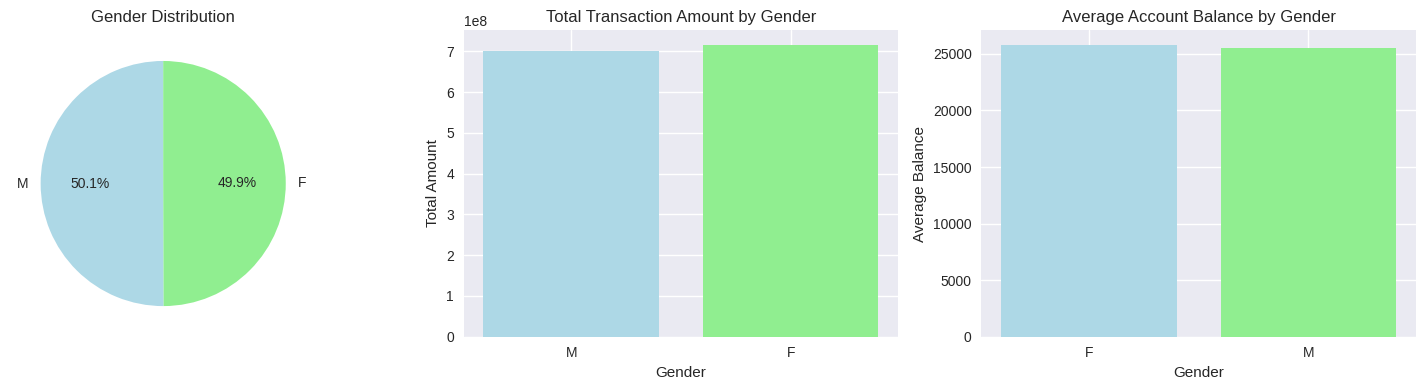

In [ ]:
#Gender Distribution Analysis
print("\n=== GENDER DISTRIBUTION ANALYSIS ===")
gender_stats = df.groupby('CustGender').agg({
    'CustomerID': 'nunique',
    'TransactionAmount': ['sum', 'mean', 'count'],
    'CustAccountBalance': 'mean'
}).round(2)

gender_stats.columns = ['Unique_CustomerID', 'Total_Amount', 'Average_Amount', 'Transaction_Count', 'Average_Balance']
display(gender_stats)

#Visualization
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
gender_counts= df['CustGender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors = ['lightblue', 'lightgreen'])
plt.title('Gender Distribution')

plt.subplot(1,3,2)
gender_amount = df.groupby('CustGender')['TransactionAmount'].sum()
plt.bar(gender_counts.index, gender_amount.values, color = ['lightblue', 'lightgreen'])
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('Total Transaction Amount by Gender')

plt.subplot(1,3,3)
gender_avg_balance = df.groupby('CustGender')['CustAccountBalance'].mean()
plt.bar(gender_avg_balance.index, gender_avg_balance.values, color = ['lightblue', 'lightgreen'])
plt.xlabel  ('Gender')
plt.ylabel('Average Balance')
plt.title('Average Account Balance by Gender')

plt.tight_layout()
plt.show()



**Location Analysis**

This section performs a **comprehensive Location Analysis** to uncover geographic patterns in customer behaviour, financial activity, and spending capacity.

Analytical summary: aggregates the CustLocation date, showing the **number of unique customers, total and average transaction amounts, transaction counts** and **average account balances** for each location. Sorting by customer provides a clear picture of where most customers are concentrated.

**Visualization**
The visualisations offer a multi-dimensional understanding of geographic trends:

**First chart:** Identifies the top 10 location by customers giving insight into where majority of customers reside.

**Second chart:** shows the highest transaction volume indicating the financially active regions.

**Third chart:** reveals the average balances of customers by their location, reflecting the relative wealth or liquidity of customers per area.

**Last chart:** ranks customer locations by the average transaction size, identifying high-value transactional hubs.

In all, this section gives a **data-driven understanding of the regional performance** helping decisions regarding **resource allocation, marketing focus and expansion strategies** based on economic activity and customer engagemenet at the location level.


=== LOCATION ANALYSIS ===
Top 10 locations by customers:


,Unique_Customers,Total_Amount,Average_Amount,Transaction_Count,Average_Balance
CustLocation,,,,,
Smithmouth,61,597855.97,852.86,701,25962.40
Jonesmouth,51,590182.34,879.56,671,26721.03
Smithfort,47,498191.97,932.94,534,22978.75
Smithview,45,632685.51,1189.26,532,32495.64
Smithburgh,41,723601.38,1467.75,493,32262.18
Smithshire,39,1182398.76,2273.84,520,22592.17
Smithton,36,566158.26,1925.71,294,25632.37
Smithfurt,35,474992.87,1178.64,403,26640.62
Smithside,34,418122.88,937.50,446,24235.58


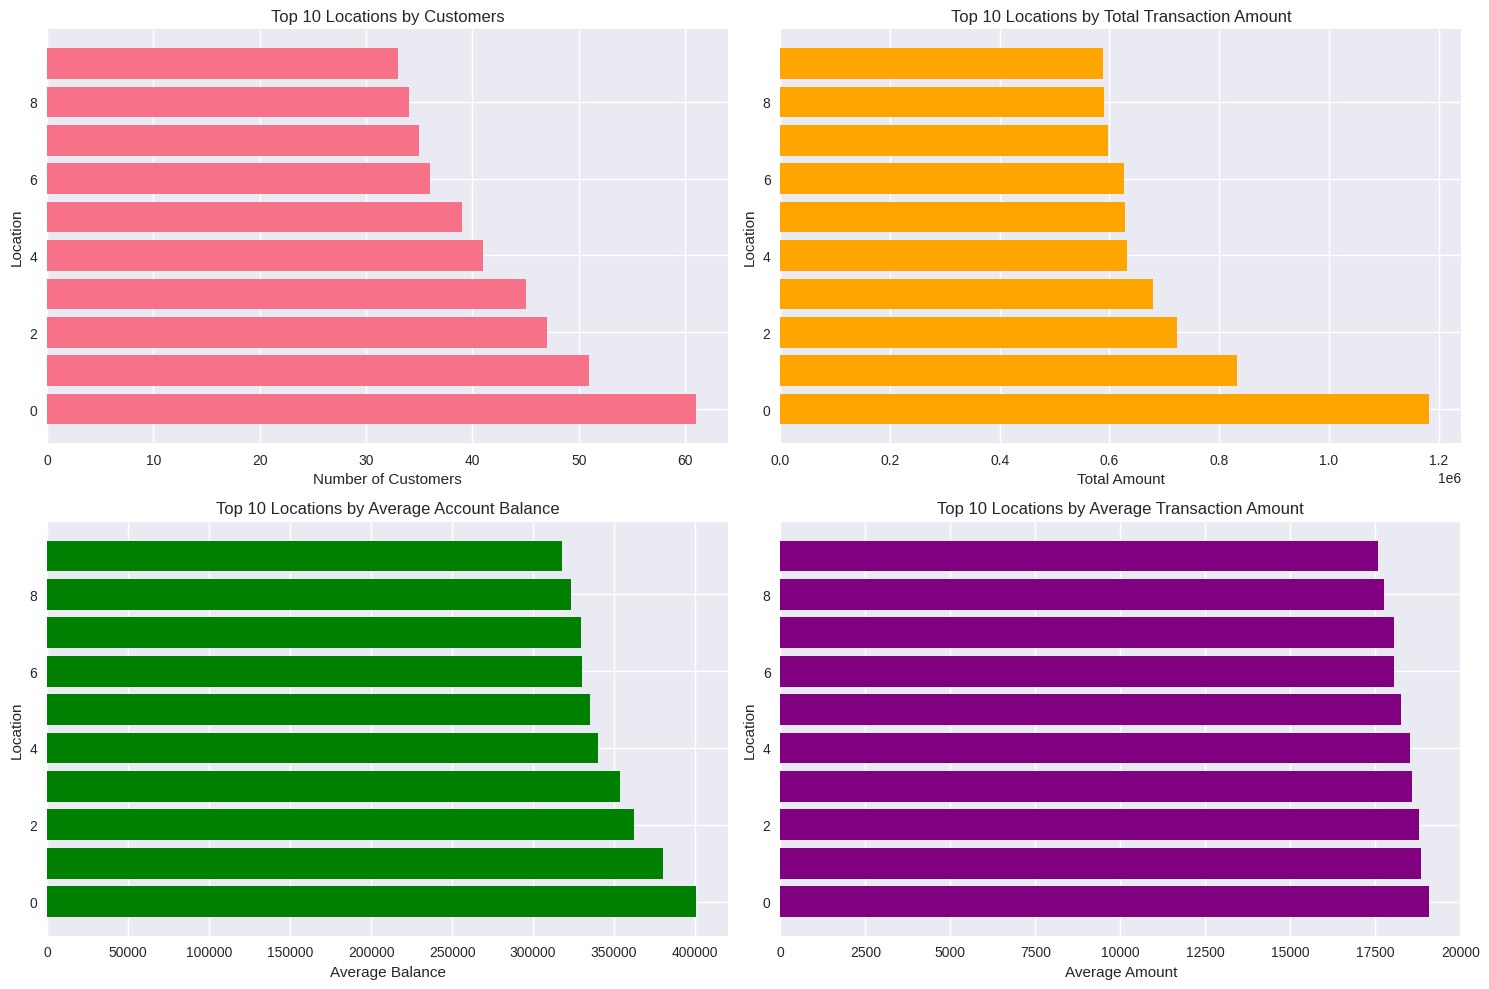

In [ ]:
#Location Analysis
print("\n=== LOCATION ANALYSIS ===")
location_stats = df.groupby('CustLocation').agg({
    'CustomerID': 'nunique',
    'TransactionAmount': ['sum', 'mean', 'count'],
    'CustAccountBalance': 'mean'
}).round(2)

location_stats.columns = ['Unique_Customers', 'Total_Amount', 'Average_Amount', 'Transaction_Count', 'Average_Balance']
location_stats = location_stats.sort_values('Unique_Customers', ascending=False)

print("Top 10 locations by customers:")
display(location_stats.head(10))

#Visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
top_locations = location_stats.head(10)['Unique_Customers']
plt.barh(range(10), top_locations.values)
plt.xlabel('Number of Customers')
plt.ylabel('Location')
plt.title('Top 10 Locations by Customers')

plt.subplot(2,2,2)
top_locations_amount = location_stats.sort_values('Total_Amount', ascending=False).head(10)['Total_Amount']
plt.barh(range(10), top_locations_amount.values, color='orange')
plt.xlabel('Total Amount')
plt.ylabel('Location')
plt.title('Top 10 Locations by Total Transaction Amount')

plt.subplot(2,2,3)
top_locations_balance = location_stats.sort_values('Average_Balance', ascending = False).head(10)['Average_Balance']
plt.barh(range(10), top_locations_balance.values, color='green')
plt.xlabel('Average Balance')
plt.ylabel ('Location')
plt.title('Top 10 Locations by Average Account Balance')

plt.subplot(2,2,4)
top_locations_avg_amount = location_stats.sort_values('Average_Amount', ascending=False).head(10)['Average_Amount']
plt.barh(range(10), top_locations_avg_amount.values, color='purple')
plt.xlabel('Average Amount')
plt.ylabel('Location')
plt.title('Top 10 Locations by Average Transaction Amount')

plt.tight_layout()
plt.show()

**Temporal Analysis**

This section conducts a **Temporal Analysis** to identify patterns in customer transactions across different time periods — monthly, weekly, and hourly. The dataset’s date and time fields are transformed to extract meaningful temporal components such as TransactionMonth, TransactionDay, and TransactionHour, allowing for a detailed breakdown of transaction behaviour over time.

The summary table presents aggregated monthly metrics, including **transaction count, total transaction amount** and unique customers**, providing a macro-level view of business activity trends.
The visualisation suite enriches this analysis through four perspectives:

The **first line plot** illustrates the monthly transaction count trend, showing fluctuations in activity volume.

The **second plot** tracks the total transaction amount over time, highlighting seasonal or cyclical financial surges.

The **third chart** displays the day-of-week transaction distribution, revealing customer engagement patterns across weekdays and weekends.

The **fourth chart** maps hourly transaction frequency, pinpointing peak transactional periods within each day.

Together, these insights deliver a comprehensive temporal overview, useful for **forecasting demand, optimising service availability,** and **strategically timing promotional or operational efforts** based on customer transaction rhythms.



=== TEMPORAL ANALYSIS ===
Monthly Trends:


,Transaction_Count,Total_Amount,Unique_Customers
TransactionMonth,,,
2020-01,25380,40159980.12,20371
2020-02,23990,37657697.26,19415
2020-03,25840,41473881.78,20668
2020-04,24625,38763119.56,19990
2020-05,25721,40244569.96,20589
2020-06,24658,38301846.62,19841
2020-07,25389,39790048.28,20386
2020-08,25515,40287170.97,20419
2020-09,24464,38479159.55,19802


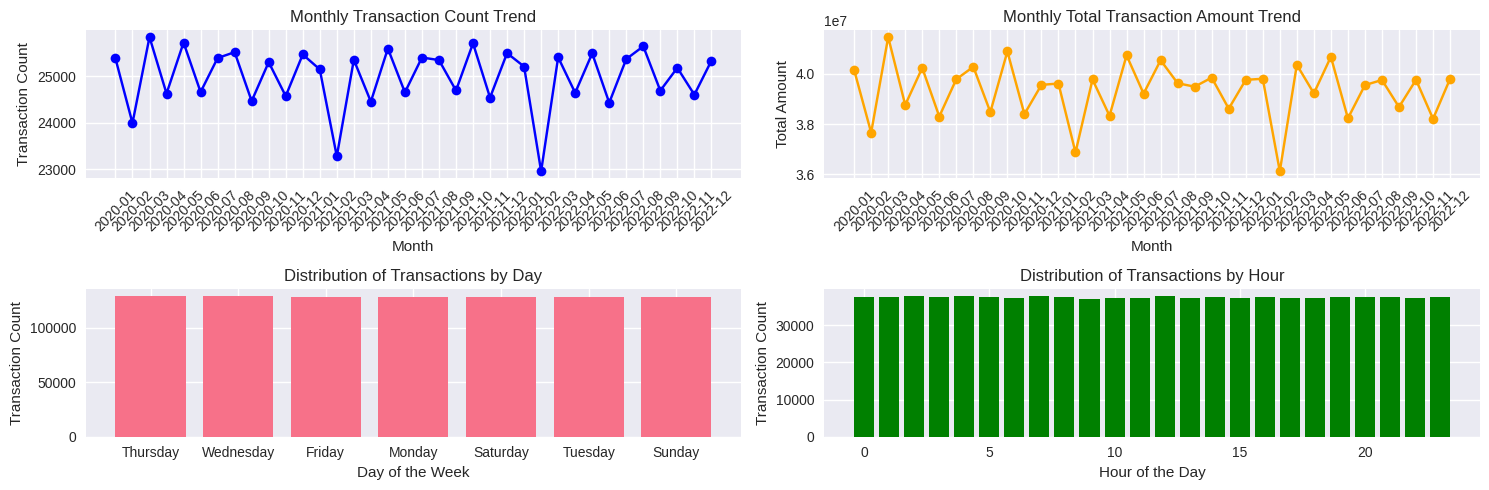

In [ ]:
#Temporal Analysis
print("\n=== TEMPORAL ANALYSIS ===")
df['TransactionDate'] =pd.to_datetime(df['TransactionDate'])
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')
df['TransactionDay'] = df['TransactionDate'].dt.day_name()
df['TransactionHour'] = df['TransactionTime'] // 10000     #Extract hour

#Monthly trends
monthly_trends = df.groupby('TransactionMonth').agg({
    'TransactionID': 'count',
    'TransactionAmount': 'sum',
    'CustomerID': 'nunique'
}).round(2)

#Monthly trends
monthly_trends.columns = ['Transaction_Count', 'Total_Amount', 'Unique_Customers']
print("Monthly Trends:")
display(monthly_trends)

#Visualization
plt.figure(figsize=(15, 5))

plt.subplot(2, 2, 1)
plt.plot(monthly_trends.index.astype(str), monthly_trends['Transaction_Count'], marker = 'o', color = 'blue')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Monthly Transaction Count Trend')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.plot(monthly_trends.index.astype(str), monthly_trends['Total_Amount'], marker = 'o', color = 'orange')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Monthly Total Transaction Amount Trend')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
day_distribution = df['TransactionDay'].value_counts()
plt.bar(day_distribution.index, day_distribution.values)
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.title('Distribution of Transactions by Day')

plt.subplot(2, 2, 4)
hour_Distribution = df['TransactionHour'].value_counts().sort_index()
plt.bar(hour_Distribution.index, hour_Distribution.values, color = 'green')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.title('Distribution of Transactions by Hour')

plt.tight_layout()
plt.show()


**Customer Behaviour Analysis**

This section performs an in-depth **Customer Behaviour Analysis** to understand transaction activity patterns, spending capacity, and overall financial engagement among customers. It examines both transactional frequency and account balance characteristics to uncover distinct behavioural profiles.

The statistical overview first summarises **transaction activity per customer**, reporting key indicators such as the average and median number of transactions, along with identifying the most and least active customers. Customers are then categorised into **activity segments** — One-Time, Occasional, Regular, and Frequent — to highlight engagement intensity across the user base.

In parallel, account balances are segmented into **financial tiers** (Very Low, Low, Medium, High, and Very High), allowing for insights into economic diversity and customer wealth distribution.

The visualisations further clarify these dynamics:

- The **first bar chart** displays customer distribution across activity segments, revealing how transaction frequency varies within the customer pool.

- The **second chart** presents the distribution of customers across account balance levels, highlighting financial stratification.

- The **third heatmap** visualises correlations among key numerical features such as transaction amount, balance, and transaction time — providing clues about behavioural interdependencies.

Together, these analyses paint a **comprehensive behavioural profile** of the customer base, enabling **data-driven segmentation, targeted retention efforts, and personalised financial strategy development.**





=== CUSTOMER BEHAVIOUR ANALYSIS ===
Average transaction per customer: 11.03
Median transaction per customer: 11.00
Most active customer: 52 transactions
Least active customer: 1 transactions

Customer Segmentation by Activity:
One-Time        9416
Occassional    23800
Regular        19909
Frequent       28416
Name: count, dtype: int64

Account Balance Segments:
Balance_Segment
Very Low      63013
Low          152714
Medium       262328
High         191541
Very High    145535
Name: count, dtype: int64


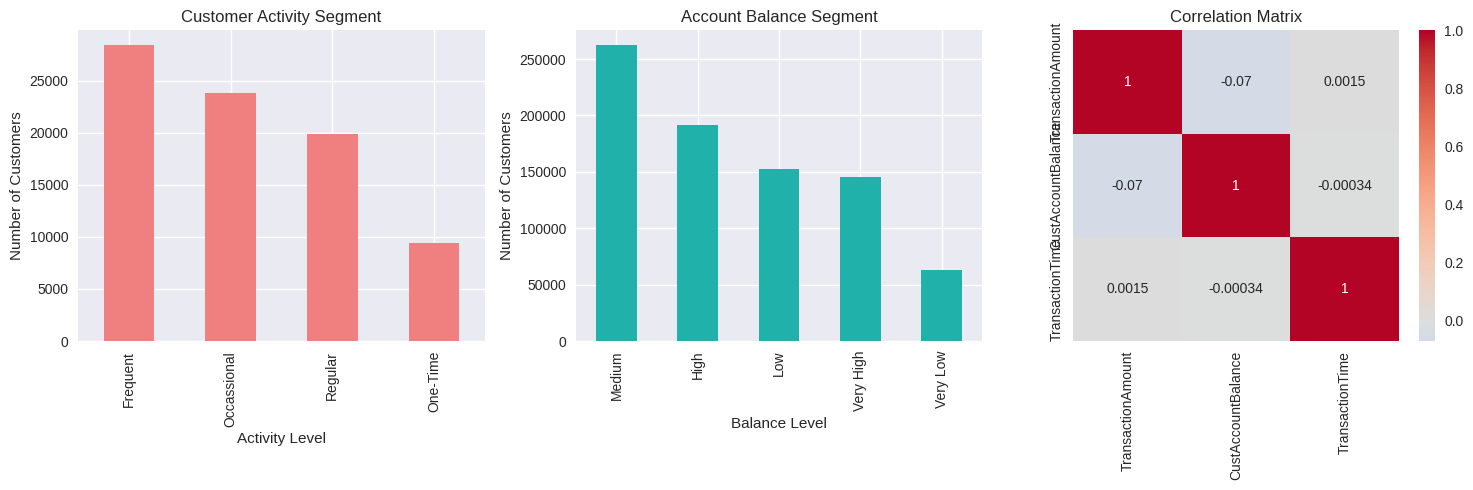

In [ ]:
# Customer Behaviour Analysis
print("\n=== CUSTOMER BEHAVIOUR ANALYSIS ===")

#Transaction per customer
transactions_per_customer = df.groupby('CustomerID').size()
print(f"Average transaction per customer: {transactions_per_customer.mean():.2f}")
print(f"Median transaction per customer: {transactions_per_customer.median():.2f}")
print(f"Most active customer: {transactions_per_customer.max()} transactions")
print(f"Least active customer: {transactions_per_customer.min()} transactions")

# Customer segmentation by activity
activity_segnments = pd.cut(transactions_per_customer,
                            bins=[0, 1, 5, 15, float('inf')],
                            labels=['One-Time', 'Occassional', 'Regular', 'Frequent'])
print("\nCustomer Segmentation by Activity:")
print(activity_segnments.value_counts().sort_index())

# Balance segments
balance_segments = pd.cut(df['CustAccountBalance'],
                          bins=[0, 1000, 5000, 20000, 50000, float('inf')],
                          labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['Balance_Segment'] = balance_segments

print("\nAccount Balance Segments:")
print(df['Balance_Segment'].value_counts().sort_index())

#Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
activity_segnments.value_counts().plot(kind='bar', color='lightcoral')
plt.title('Customer Activity Segment')
plt.xlabel('Activity Level')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
df['Balance_Segment'].value_counts().plot(kind='bar', color='lightseagreen')
plt.title('Account Balance Segment')
plt.xlabel('Balance Level')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 3)
# Correlation heatmap for numerical variables
corr_matrix = df[['TransactionAmount', 'CustAccountBalance', 'TransactionTime']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()


**Phase 2: Data Preprocessing**

This phase focuses on cleaning and preparing the dataset for analysis or model training. It ensures that all entries are valid, consistent, and ready for feature extraction.

**Step-by-step explanation:**

**1. Checking for Missing Values** The script examines the dataset for any missing values and prints the total count before cleaning begins.

**2. Removing Missing Entries** Any rows containing missing data are removed to maintain data integrity. The number of rows removed is displayed.

**3. Removing Duplicate** Transactions Duplicate records are identified based on the TransactionID column and removed. This ensures each transaction appears only once.

**4. Converting Transaction** Dates The TransactionDate column is converted into a proper datetime format using pandas.to_datetime(), enabling accurate time-based operations later.

**5. Final Dataset Summary** The final shape of the dataset (rows and columns) and the count of unique customers (CustomerID) are printed to confirm successful preprocessing.

**Outcome:** After this phase, the dataset is free from missing values and duplicates, and all transaction dates are correctly formatted. The cleaned dataset is now ready for the next stages of data analysis or modelling.



In [ ]:
print("=" * 50)
print("PHASE 2: DATA PREPROCESSING")
print("=" * 50)

#Handle missing values if any
print("Checking for missing values...")
print(f"Missing values before cleaning: {DataFrame.isnull().sum()}")

#Remove any remaining missing values
initial_count = len(DataFrame)
DataFrame = DataFrame.dropna()
print(f"Removed {initial_count - len(DataFrame)} rows with missing values")

# Remove duplicates
initial_count = len(DataFrame)
DataFrame = DataFrame.drop_duplicates(subset=['TransactionID'])
print(f"Removed {initial_count - len(DataFrame)} duplicate transactions")

#Ensure proper datetime format
DataFrame['TransactionDate'] = pd.to_datetime(DataFrame['TransactionDate'])
print(f"Final Dataset shape: {DataFrame.shape}")
print(f"Unique customers: {DataFrame['CustomerID'].nunique()}")


PHASE 2: DATA PREPROCESSING
Checking for missing values...
Missing values before cleaning: TransactionID         0
CustomerID            0
TransactionDate       0
TransactionTime       0
TransactionAmount     0
CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
dtype: int64
Removed 0 rows with missing values
Removed 48431 duplicate transactions
Final Dataset shape: (899486, 9)
Unique customers: 81541


**Phase 3: Feature Engineering (RFM Metrics)**

This phase focuses on transforming cleaned transactional data into meaningful features that help assess customer behaviour and value. The RFM (Recency, Frequency, Monetary) model is used to segment customers based on their purchase patterns.

**Step-by-step explanation:**

**1. Setting the Reference Date:** Defines the reference date as one day after the most recent transaction. This date is used to calculate how recently each customer made a purchase.

**2. Computing RFM Metrics:** Aggregates data by CustomerID and calculates three key metrics:

**Recency:** The number of days since the customer’s last purchase (reference_date - last_transaction_date).

**Frequency:** The total number of transactions made by the customer.

**Monetary:** The total amount spent by the customer.

The resulting dataframe (rfm_df) summarises these metrics for each unique customer.

**3. Adding Customer Demographics** Merges customer demographic attributes (such as date of birth, gender, location, and account balance) into the RFM dataframe for enriched analysis.

**4. RFM Summary Statistics** Prints summary statistics (mean, min, max, quartiles, etc.) for the Recency, Frequency, and Monetary columns, giving an overview of customer distribution and spending behaviour.

**5. Displaying Sample Data** Shows the first 10 rows of the final RFM dataframe for verification and inspection.


In [ ]:
print("\n" + "=" * 50)
print("PHASE 3: FEATURE ENGINEERING (RFM METRICS)")
print("=" * 50)

#set reference date (day after last transaction
reference_date = df['TransactionDate'].max() + pd.Timedelta(days=1)
print(f"Reference Date for Recency calculation: {reference_date.date()}")

# Calculate RFM metrics for each customer
rfm_df = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days, #Recency
    'TransactionID': 'count',                                         #Frequency
    'TransactionAmount': 'sum'                                      #Monetary
}).reset_index()

rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(f"RFM DataFrame shape: {rfm_df.shape}")
display(rfm_df.head())


PHASE 3: FEATURE ENGINEERING (RFM METRICS)
Reference Date for Recency calculation: 2023-01-01
RFM DataFrame shape: (81541, 4)


,CustomerID,Recency,Frequency,Monetary
0,C1000107,1040,1,96.41
1,C1000111,8,16,819.81
2,C1000159,106,15,695.53
3,C1000852,178,24,1355.99
4,C1000896,56,14,65914.10


In [ ]:
#Add customer demographics to RFM data
customer_demographics = df.groupby('CustomerID').agg({
    'CustomerDOB': 'first',
    'CustGender': 'first',
    'CustLocation': 'first',
    'CustAccountBalance': 'last'
}).reset_index()
customer_demographics.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,C1000107,2001-06-27,F,South Josh,1150.66
1,C1000111,1952-11-18,M,New Peter,52895.11
2,C1000159,1988-07-23,M,Lake Duncanburgh,3006.98
3,C1000852,1985-10-06,M,Thomasborough,11922.49
4,C1000896,1945-04-10,M,East Kim,43815.21


In [ ]:
rfm_df = rfm_df.merge(customer_demographics, on='CustomerID', how='left')
#rfm_df.head()

print("\nRFM Metrics Summary:")
print(rfm_df[['Recency', 'Frequency', 'Monetary']].describe())

# Display first few rows of RFM data
print("\nFirst 10 rows of RFM data:")
display(rfm_df.head(10))






RFM Metrics Summary:
            Recency     Frequency       Monetary
count  81541.000000  81541.000000   81541.000000
mean     187.824677     11.031089   17373.985531
std      237.063205      8.324877   30557.214473
min        1.000000      1.000000       1.300000
25%       31.000000      3.000000     725.310000
50%       86.000000     11.000000    1090.810000
75%      243.000000     18.000000   18205.760000
max     1096.000000     52.000000  230287.980000

First 10 rows of RFM data:


,CustomerID,Recency,Frequency,Monetary,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,C1000107,1040,1,96.41,2001-06-27,F,South Josh,1150.66
1,C1000111,8,16,819.81,1952-11-18,M,New Peter,52895.11
2,C1000159,106,15,695.53,1988-07-23,M,Lake Duncanburgh,3006.98
3,C1000852,178,24,1355.99,1985-10-06,M,Thomasborough,11922.49
4,C1000896,56,14,65914.10,1945-04-10,M,East Kim,43815.21
5,C1000976,72,19,1064.70,2003-06-24,F,New Nigelville,1660.27
6,C1001005,246,13,670.30,1960-10-12,F,New Frances,51131.84
7,C1001021,458,1,4080.97,1987-06-26,M,Roseland,512.70
8,C1001094,88,19,96064.36,1999-12-16,F,West Reeceborough,0.00
9,C1001172,642,1,7376.57,2002-05-29,F,Brownchester,5539.94


**RFM Scoring and Customer Segmentation**

This section focuses on converting the calculated RFM metrics into standardised scores and combining them to segment customers based on behaviour and value.

1. **Creating RFM Scores.** Each RFM metric is converted into a 1–5 scale using pd.qcut, which divides data into five equal groups (quintiles):
**Recency (R_Score): **Customers who purchased more recently get higher scores (5 = most recent, 1 = least recent).
**Frequency (F_Score):** Customers with more transactions receive higher scores (5 = most frequent).
**Monetary (M_Score):** Customers who spent more get higher scores (5 = highest spenders).

2. **Converting Scores to Numeric Format** All RFM score columns are converted to integer types for mathematical operations and easier manipulation.

**3. Combining Scores** Two additional fields are created:
**RFM_Score:** The sum of all three scores, providing a total behavioural score.
**RFM_Group:** A concatenated string representation (e.g., "543") for easier segment identification.

4. **RFM Scoring Summary and Distribution** Summary statistics and value counts are displayed for each score to visualise the distribution and ensure the scoring is balanced across customers.

In [ ]:
print("\n" + "=" * 50)
print("PHASE 4: RFM SCORING AND SEGMENTATION")
print("=" * 50)

#Create RFM scores (1-5 scale)
#Recency: lower recency = better (more recent)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])

# Frequency: higher frequency = better
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=5, labels=[1, 2, 3, 4, 5])

# Monetary: higher monetary = better
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=[1, 2, 3, 4, 5])



PHASE 4: RFM SCORING AND SEGMENTATION


In [ ]:
display(rfm_df)

,CustomerID,Recency,Frequency,Monetary,CustomerDOB,CustGender,CustLocation,CustAccountBalance,R_Score,F_Score,M_Score
0,C1000107,1040,1,96.41,2001-06-27,F,South Josh,1150.66,1,1,1
1,C1000111,8,16,819.81,1952-11-18,M,New Peter,52895.11,5,4,2
2,C1000159,106,15,695.53,1988-07-23,M,Lake Duncanburgh,3006.98,3,4,2
3,C1000852,178,24,1355.99,1985-10-06,M,Thomasborough,11922.49,2,5,4
4,C1000896,56,14,65914.10,1945-04-10,M,East Kim,43815.21,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...
81536,C9999410,118,17,77370.14,1982-11-07,F,Randallton,44182.03,3,4,5
81537,C9999580,174,2,363.63,1969-03-12,F,Crosstown,36964.87,2,1,1
81538,C9999605,110,18,916.18,1961-12-30,F,Morrisonville,7259.05,3,4,2
81539,C9999758,375,3,623.11,1973-09-07,M,East Natasha,20600.10,1,2,1


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81541 entries, 0 to 81540
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CustomerID          81541 non-null  object  
 1   Recency             81541 non-null  int64   
 2   Frequency           81541 non-null  int64   
 3   Monetary            81541 non-null  float64 
 4   CustomerDOB         81541 non-null  object  
 5   CustGender          81541 non-null  object  
 6   CustLocation        81541 non-null  object  
 7   CustAccountBalance  81541 non-null  float64 
 8   R_Score             81541 non-null  category
 9   F_Score             81541 non-null  category
 10  M_Score             81541 non-null  category
dtypes: category(3), float64(2), int64(2), object(4)
memory usage: 5.2+ MB


In [ ]:
# Convert score to numeric
rfm_df['R_Score'] = rfm_df['R_Score'].astype(int)
rfm_df['F_Score'] = rfm_df['F_Score'].astype(int)
rfm_df['M_Score'] = rfm_df['M_Score'].astype(int)

In [ ]:
#Create RFM combined score
rfm_df['RFM_Score'] = rfm_df['R_Score'] + rfm_df['F_Score'] + rfm_df['M_Score']
rfm_df['RFM_Group'] = rfm_df['RFM_Score'].astype(str) + rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

print("\nRFM Score Summary:")
print(rfm_df[['R_Score', 'F_Score', 'M_Score', 'RFM_Score']].describe())

# Display score distribution
print("\nRFM Score Distribution:")
print("R_Score distribution")
print(rfm_df['R_Score'].value_counts().sort_index())
print("\nF_Score distribution")
print(rfm_df['F_Score'].value_counts().sort_index())
print("\nM_Score distribution")
print(rfm_df['M_Score'].value_counts().sort_index())



RFM Score Summary:
            R_Score       F_Score       M_Score     RFM_Score
count  81541.000000  81541.000000  81541.000000  81541.000000
mean       3.006414      2.916790      2.999975      8.923180
std        1.417270      1.401471      1.414231      3.188223
min        1.000000      1.000000      1.000000      3.000000
25%        2.000000      2.000000      2.000000      6.000000
50%        3.000000      3.000000      3.000000      9.000000
75%        4.000000      4.000000      4.000000     12.000000
max        5.000000      5.000000      5.000000     15.000000

RFM Score Distribution:
R_Score distribution
R_Score
1    16284
2    16221
3    16284
4    16192
5    16560
Name: count, dtype: int64

F_Score distribution
F_Score
1    18461
2    14755
3    17047
4    17664
5    13614
Name: count, dtype: int64

M_Score distribution
M_Score
1    16309
2    16308
3    16308
4    16308
5    16308
Name: count, dtype: int64


**K-Means Clustering Preparation for RFM Analysis**

This section prepares the **RFM dataset** for clustering analysis using the **K-Means algorithm** by transforming, scaling, and structuring the data to ensure optimal performance and accurate segmentation.

**1. Selecting Relevant Features** Only the key RFM metrics — Recency, Frequency, and Monetary — are extracted for clustering since they represent customer engagement and value patterns.

**2. Handling Skewness with Log Transformation**. Transaction data often exhibits right-skewed distributions (a few customers spend or purchase far more than others). To stabilise variance and reduce skewness, a log(1 + x) transformation is applied to each metric. This transformation makes the data more normally distributed, improving clustering quality.

**3. Standardising the Features** K-Means is sensitive to the scale of features. Therefore, each transformed variable is standardised using StandardScaler, which rescales data to have zero mean and unit variance. This ensures that all features contribute equally to the clustering process, preventing large-scale variables (like Monetary) from dominating the algorithm.

**4. Final Output** The processed dataset (rfm_scaled_df) is ready for clustering and contains the standardised Recency, Frequency, and Monetary values suitable for input into the K-Means model.


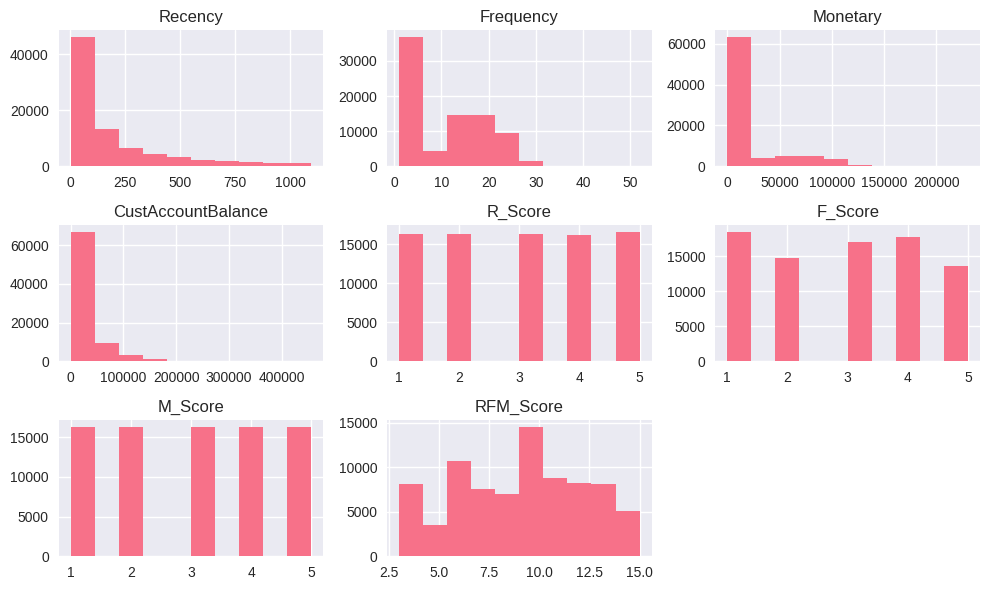

In [ ]:
#checking skewness before log transformation
rfm_df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [ ]:
#print("\n===" + "====")
print("K-MEANS CLUSTERING PREPARATION FOR RFM ANALYSIS")

# Prepare data for clustering
rfm_clustering = rfm_df[['Recency', 'Frequency', 'Monetary']].copy()

#Handle skewness with log transformation
rfm_clustering['Recency'] = np.log1p(rfm_clustering['Recency'])
rfm_clustering['Frequency'] = np.log1p(rfm_clustering['Frequency'])
rfm_clustering['Monetary'] = np.log1p(rfm_clustering['Monetary'])

K-MEANS CLUSTERING PREPARATION FOR RFM ANALYSIS


    Recency  Frequency   Monetary
0  6.947937   0.693147   4.578929
1  2.197225   2.833213   6.710292
2  4.672829   2.772589   6.546111
3  5.187386   3.218876   7.213024
4  4.043051   2.708050  11.096123


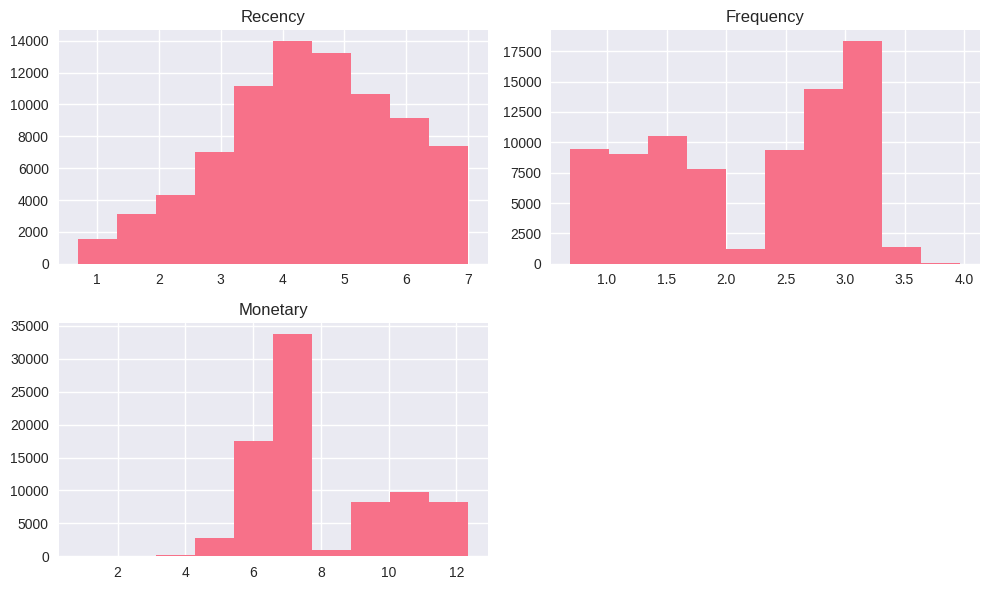

In [ ]:
#Check clustered data
print(rfm_clustering.head())

#visualization of skewness after log transformation before standardization
rfm_clustering.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [ ]:
#Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

print("Data prepared for clustering(scaled and transformed)")
display(rfm_scaled_df.head())

Data prepared for clustering(scaled and transformed)


,Recency,Frequency,Monetary
0,1.785218,-1.657004,-1.691785
1,-1.570545,0.762877,-0.608726
2,0.178149,0.694326,-0.692155
3,0.541617,1.198966,-0.353261
4,-0.266708,0.621349,1.619949


**Determining the Optimal Number of Clusters**

This section identifies the most appropriate number of clusters (k) for segmenting customers based on their RFM features. Choosing the right number of clusters is essential for meaningful and interpretable customer segmentation.

**1. Elbow Method (WCSS Analysis) The Elbow Method** evaluates the Within-Cluster Sum of Squares (WCSS) for different values of k.

- As k increases, WCSS decreases since more clusters mean tighter groups.
- The optimal k is typically found at the “elbow point” — where the rate of decrease in WCSS sharply slows down. This point balances compactness (low WCSS) with simplicity (fewer clusters).

2**. Silhouette Score Evaluation** The Silhouette Score measures how similar each data point is to its assigned cluster compared to other clusters.

- Scores range from -1 to 1, where values closer to 1 indicate well-separated, cohesive clusters.
- By calculating silhouette scores for each k, the optimal number of clusters corresponds to the highest score, ensuring well-defined segment boundaries.

**3. Visualization of Results** Two plots are generated for comparison:

- **Elbow Plot:** Displays WCSS against the number of clusters.
- **Silhouette Plot:** Displays silhouette scores across different values of k. These visuals help confirm the best balance between model simplicity and segmentation accuracy.

**4. Selecting the Optimal k** The script automatically selects the number of clusters with the highest silhouette score as the optimal k, ensuring statistically sound and interpretable clustering performance.


In [ ]:
# Determine the optimal number of Clusters
print("\n=== DETERMINING THE OPTIMAL NUMBER OF CLUSTERS ===")

# Elbow Method
wcss = []
silhouette_scores = []
cluster_range = range(2,11)

for k in cluster_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(rfm_scaled_df)
  wcss.append(kmeans.inertia_)

  # Silhouette Score
  if k > 1:   #Silhouette score requires at least 2 clusters
      score = silhouette_score(rfm_scaled_df, kmeans.labels_)
      silhouette_scores.append(score)




=== DETERMINING THE OPTIMAL NUMBER OF CLUSTERS ===


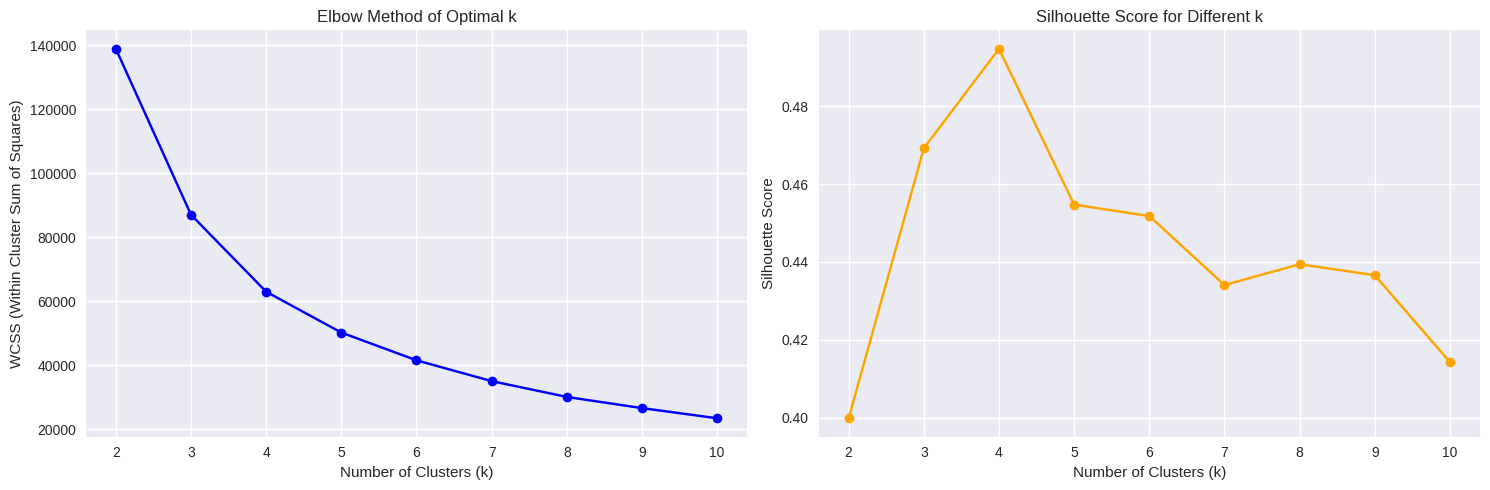

Optimal number of clusters (k) based on Silhouette Score: 4
Best silhoutte score: 0.4947


In [ ]:
# Plot Elbow Method and Silhoutte Scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method of Optimal k')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2,11), silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)

plt.tight_layout()
plt.show()

#find optimal k based on Silhoutte score
optimal_k = range(2,11)[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (k) based on Silhouette Score: {optimal_k}")
print(f"Best silhoutte score: {max(silhouette_scores):.4f}")

**Applying K-Means Clustering and Customer Segmentation**

This section applies **K-Means clustering** to group customers based on their Recency, Frequency, and Monetary (RFM) metrics, followed by an interpretive analysis of each cluster to derive actionable business insights.

**1. Applying K-Means Clustering** Using the optimal number of clusters (optimal_k) determined earlier, the **K-Means algorithm** is fitted on the scaled RFM dataset. Each customer is assigned to a cluster based on their RFM profile, capturing behavioural similarities such as purchase recency, transaction frequency, and total spending. The results are stored in a new column, Cluster, within the rfm_df DataFrame.

**2. Cluster Analysis and Summary Statistics** After clustering, a detailed **aggregate analysis** is performed for each cluster to understand its behavioural characteristics. The following metrics are computed for each cluster:

- Average Recency, Frequency, and Monetary values.
- Mean RFM component scores (R_Score, F_Score, M_Score).
- Customer count (Count) within each cluster.
- Average account balance (Avg_Account_Balance).
- Most common gender (Most_Common_Gender).

This analysis provides a clear overview of how different customer segments behave and what distinguishes them.

**3. Assigning Descriptive Cluster Names.** To make interpretation intuitive, clusters are automatically labelled based on their RFM patterns and spending activity:
- **High-Value Dormant Customers:** High spenders who haven’t purchased in over a year.
- **Dormant Low-Value Customers:** Low spenders with no recent activity.
High-Value Inactive Customers: High-value customers inactive for 6–12 months.
- **Inactive Low-Value Customers:** Low-spending customers inactive for months.
- **Active VIP Customers:** Frequently purchasing, high-spending customers.
Active Low-Value Customers: Regularly active but low spenders.
**Regular Customers:** Moderate in both spending and activity.
This step translates raw cluster indices into business-friendly customer segments, facilitating strategic actions such as re-engagement campaigns or loyalty programs.

**4. Cluster Distribution Overview** Finally, the code computes and prints the **distribution of customers across cluster names**, showing how customers are spread among the defined behavioural categories. This summary provides an at-a-glance understanding of the dominant customer groups and their potential business impact.


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# === APPLY k-means clustering ===
print(f"\n === APPLYING K-MEANS WITH {optimal_k} CLUSTERS ===")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df)



 === APPLYING K-MEANS WITH 4 CLUSTERS ===


In [ ]:
#rfm_df.head()
rfm_df['Cluster'].value_counts()

,count
Cluster,
2,31798
1,22478
0,15364
3,11901


In [ ]:
# Analyze Clusters
cluster_analysis = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean',
    'CustomerID': 'count',
    'CustAccountBalance': 'mean',
    'CustGender': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).round(2)

cluster_analysis.columns = [
    'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary',
    'Avg_R_Score', 'Avg_F_Score', 'Avg_M_Score',
    'Count', 'Avg_Account_Balance', 'Most_Common_Gender'
]

print("Cluster Analysis: ")
display(cluster_analysis)

Cluster Analysis: 


,Avg_Recency,Avg_Frequency,Avg_Monetary,Avg_R_Score,Avg_F_Score,Avg_M_Score,Count,Avg_Account_Balance,Most_Common_Gender
Cluster,,,,,,,,,
0,69.27,15.21,75828.79,3.70,3.65,4.98,15364,16397.80,M
1,324.12,3.45,648.34,1.92,1.77,1.74,22478,28074.14,M
2,52.52,17.84,963.53,3.95,4.03,2.52,31798,27370.33,F
3,444.97,1.77,17347.04,1.64,1.17,4.10,11901,24691.85,M


In [ ]:
# --- REFINED CLUSTER NAMING BASED ON RECENCY FIRST---
def assign_cluster_name(stats):
    recency = stats['Avg_Recency']
    frequency = stats['Avg_Frequency']
    monetary = stats['Avg_Monetary']

    # Recency thresholds
    if recency > 365:
      # Haven't purchased in a year
      if monetary > 20000:
        return 'High-Value Dormant Customers'
      else:
        return 'Dormant Low-Value Customers'
    elif recency > 180:
      # Inactive for 6-12 months
      if monetary > 20000:
        return 'High-Value Inactive Customers'
      else:
        return 'Inactive Low-Value Customers'

    # Active customers (recent transactions)
    if frequency > 10 and monetary > 30000:
      return 'Active VIP Customers'
    elif frequency > 8 and monetary > 10000:
      return 'Active Low-Value Customers'
    else:
      return 'Regular Customers'

#Map names dynamically
rfm_df['Cluster_Name'] = rfm_df['Cluster'].map(lambda x: assign_cluster_name(cluster_analysis.loc[x]))



In [ ]:
# cluster distribution
print("\n Final Cluster Distribution:")
cluster_distribution = rfm_df['Cluster_Name'].value_counts()
print(cluster_distribution)


 Final Cluster Distribution:
Cluster_Name
Regular Customers               31798
Inactive Low-Value Customers    22478
Active VIP Customers            15364
Dormant Low-Value Customers     11901
Name: count, dtype: int64


**Customer Segmentation Visualisation and Cluster Profiling**

This section provides a **visual and statistical summary** of customer segments derived from K-Means clustering on RFM metrics. The goal is to better understand segment characteristics, proportions, and behavioural differences through aggregated metrics and clear visual representations.

**1. Cluster Profile Generation** The first step computes **summary statistics** for each customer segment (Cluster_Name) using the RFM dataset. The following metrics are aggregated:
Recency, Frequency, and Monetary: Mean and standard deviation to capture both central tendency and variation within clusters.
Customer_Count: Number of customers per cluster.
Avg_Account_Balance: Average account balance for customers in each group. Additionally, a Percentage column is calculated to show each segment’s share of the total customer base.
This statistical summary provides the foundation for quantitative comparison between clusters.

**2. Customer Distribution Pie Chart** A **pie chart** visualises the overall distribution of customers across all defined segments. Each slice represents a distinct cluster, with labels showing both the percentage and absolute number of customers. The chart gives an immediate overview of how the customer base is divided among behavioural groups — highlighting dominant and niche segments. Distinct color schemes and slight explosion effects improve clarity and emphasis.

**3. Average RFM Values by Segment (Bar Chart) A grouped bar chart** illustrates the average Recency, Frequency, and Monetary values across clusters:
Recency reflects how recently customers purchased.
Frequency indicates purchase activity level.
Monetary (scaled in thousands) represents total spending. This comparison helps identify which segments are the most active or valuable, providing actionable insight into engagement strategies.

**4. Segment Size Comparison (Horizontal Bar Chart) A horizontal bar chart** ranks customer segments by their population size. It visually compares the number of customers per cluster, helping to identify:
Large, general segments represent the majority of the customer base.
Smaller, specialised segments like high-value or dormant customers. Labels on each bar display exact counts for readability and quick reference.

**5. Insights and Strategic Use** Together, these visuals form a comprehensive customer intelligence dashboard:

- The **pie chart** gives macro-level proportions.
- The **bar charts** reveal micro-level behavioural and value differences.
- The **cluster profile table** connects statistical rigour with visual storytelling.

This stage enables businesses to tailor marketing actions, allocate resources effectively, and design retention or reactivation campaigns based on data-driven customer segmentation insights.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Generate cluster profiles from rfm_df
cluster_profiles = rfm_df.groupby('Cluster_Name').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std'],
    'CustomerID': 'count',
    'CustAccountBalance': 'mean'
}).round(2)

# Flatten columns
cluster_profiles.columns = ['_'.join(col).strip() for col in cluster_profiles.columns.values]
cluster_profiles = cluster_profiles.rename(columns={
    'Recency_mean': 'Avg_Recency', 'Recency_std': 'Std_Recency',
    'Frequency_mean': 'Avg_Frequency', 'Frequency_std': 'Std_Frequency',
    'Monetary_mean': 'Avg_Monetary', 'Monetary_std': 'Std_Monetary',
    'CustomerID_count': 'Customer_Count', 'CustAccountBalance_mean': 'Avg_Account_Balance'
})
cluster_profiles['Percentage'] = (cluster_profiles['Customer_Count'] / len(rfm_df) * 100).round(2)

print("Cluster Profiles successfully created:")
display(cluster_profiles)




Cluster Profiles successfully created:


,Avg_Recency,Std_Recency,Avg_Frequency,Std_Frequency,Avg_Monetary,Std_Monetary,Customer_Count,Avg_Account_Balance,Percentage
Cluster_Name,,,,,,,,,
Active VIP Customers,69.27,67.66,15.21,4.65,75828.79,22739.72,15364,16397.80,18.84
Dormant Low-Value Customers,444.97,294.22,1.77,0.89,17347.04,8393.16,11901,24691.85,14.60
Inactive Low-Value Customers,324.12,249.54,3.45,2.09,648.34,356.37,22478,28074.14,27.57
Regular Customers,52.52,50.08,17.84,6.03,963.53,277.63,31798,27370.33,39.00


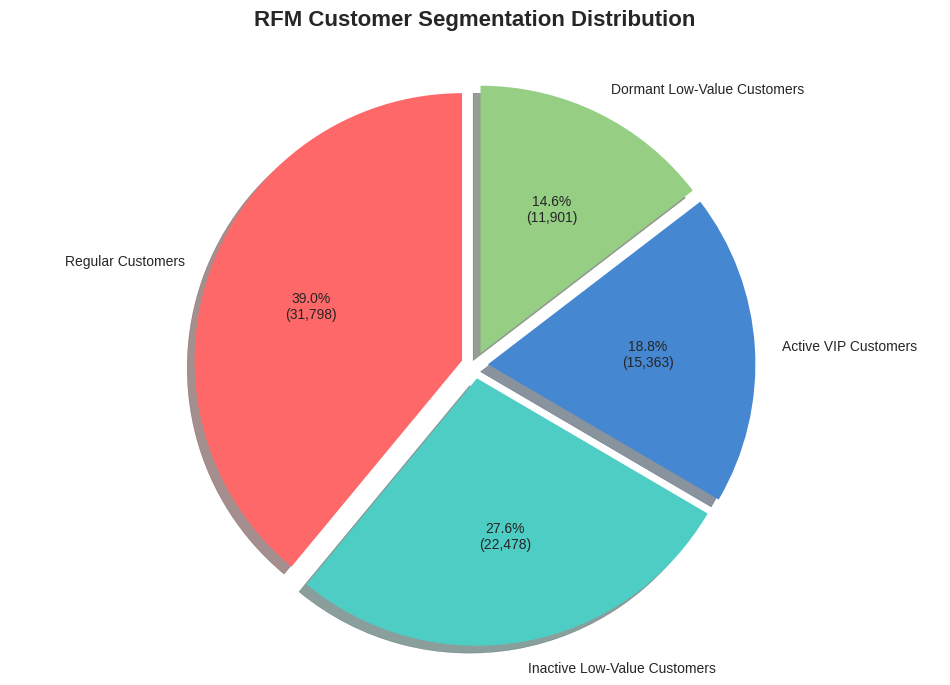

In [ ]:
# Visualizations

# --- Colors ---
colors = ['#FF6868', '#4ECDC4', '#4587D1', '#96CE84', '#FFEAA7', 'DDA800', '9808C8']

# --- Big Pie Chart for Customer Distribution ---
segment_counts = rfm_df['Cluster_Name'].value_counts()
plt.figure(figsize=(12, 8))
explode = [0.05] * len(segment_counts)
plt.pie(segment_counts.values,
        labels=segment_counts.index,
        autopct=lambda p: f'{p:.1f}%\n({int(p*sum(segment_counts.values)/100):,})',
        startangle=90,
        colors=colors[:len(segment_counts)],
        explode=explode,
        shadow=True)
plt.title('RFM Customer Segmentation Distribution\n', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()



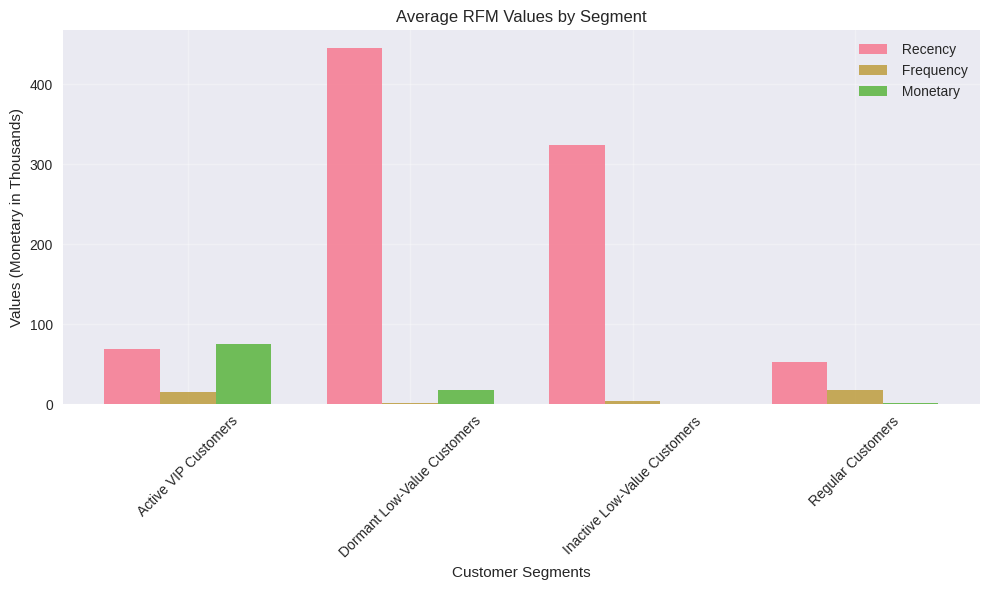

In [ ]:

# --- Bar Chart - Average RFM by Segment ---
plt.figure(figsize=(10, 6))
rfm_metrics = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary']
x_pos = np.arange(len(cluster_profiles))
width = 0.25

for i, metric in enumerate(rfm_metrics):
    values = cluster_profiles[metric].values
    if metric == 'Avg_Monetary':
        values = values / 1000  #Thousands
    plt.bar(x_pos + i * width, values, width, label=metric.replace('Avg_', ' '), alpha = 0.8)

plt.xlabel('Customer Segments')
plt.ylabel('Values (Monetary in Thousands)')
plt.title('Average RFM Values by Segment')
plt.xticks(x_pos + width, cluster_profiles.index, rotation=45)
plt.legend()
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()



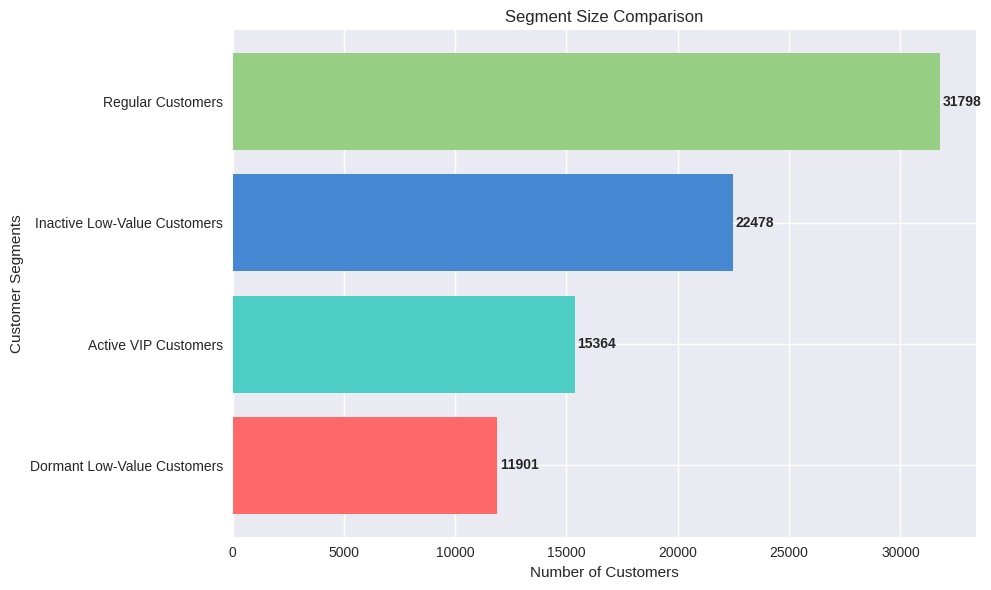

In [ ]:

# --- Horizontal Bar Chart - Segment Sizes ---
plt.figure(figsize=(10, 6))
segment_sizes = cluster_profiles.sort_values('Customer_Count')['Customer_Count']
plt.barh(range(len(segment_sizes)), segment_sizes.values, color=colors[:len(segment_sizes)])
plt.yticks(range(len(segment_sizes)), segment_sizes.index)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segments')
plt.title('Segment Size Comparison')
for i, v in enumerate(segment_sizes.values):
    plt.text(v + 100, i, f'{v:}', va='center', fontweight='bold')
plt.tight_layout()
plt.show()


**Customer Segmentation Dataset Generation**

This section defines the function get_segmented_customers(), which organises, refines, and optionally exports the **final segmented customer dataset** produced after RFM analysis and clustering.

**Purpose:** The function creates a clean and structured dataset that consolidates all relevant customer metrics, RFM scores, and their assigned clusters (both numeric and descriptive). It helps in preparing results for **analysis, visualisation, or reporting.**

**Core Functionalities:**

**1. Input Data:** Accepts an RFM-enriched DataFrame (rfm_df) containing metrics such as Recency, Frequency, Monetary, RFM scores, and clustering results.

**2. Output Customisation:**

- When include_all_columns=False, only key columns are retained for clarity: CustomerID, Recency, Frequency, Monetary, R_Score, F_Score, M_Score, Cluster, and Cluster_Name.

- When include_all_columns=True, the complete DataFrame is returned, preserving all original attributes for deeper analysis.

**3. Sorting Logic:** The resulting dataset is sorted **first by Cluster_Name** (grouping customers within the same segment) and then by **Monetary in descending order**, highlighting the most valuable customers in each group.

**4. Optional Export:** If a file path is provided via output_csv, the dataset is automatically exported as a CSV file. A success message confirms the save location for traceability.

**5. Output Summary:** After processing, the function prints a summary showing:
The total number of customers is included.
The number of distinct customer segments (Cluster_Name) identified.

**6. Return Value:** Returns the processed and sorted DataFrame, which can be displayed directly (as shown using display(segmented_df.head())) or used for subsequent business reporting and visualisation.

**Outcome:** The function provides a structured, human-readable dataset that bridges analytical results with actionable insights, enabling quick access to customer profiles and facilitating strategic, segmentation-driven marketing decisions.




In [ ]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,CustomerDOB,CustGender,CustLocation,CustAccountBalance,R_Score,F_Score,M_Score,RFM_Score,RFM_Group,Cluster,Cluster_Name
0,C1000107,1040,1,96.41,2001-06-27,F,South Josh,1150.66,1,1,1,3,3111,1,Inactive Low-Value Customers
1,C1000111,8,16,819.81,1952-11-18,M,New Peter,52895.11,5,4,2,11,11542,2,Regular Customers
2,C1000159,106,15,695.53,1988-07-23,M,Lake Duncanburgh,3006.98,3,4,2,9,9342,2,Regular Customers
3,C1000852,178,24,1355.99,1985-10-06,M,Thomasborough,11922.49,2,5,4,11,11254,2,Regular Customers
4,C1000896,56,14,65914.10,1945-04-10,M,East Kim,43815.21,4,3,5,12,12435,0,Active VIP Customers


In [ ]:
def get_segmented_customers(rfm_df, include_all_columns=False, output_csv=None):
    """
    Returns a clean dataset of all customers with their RFM metrics,
    assigned cluster number, and human-readable segment name.
    Optionally saves the dataset to a CSV file.

    Parameters:
    ------------
    rfm_df (pd.DataFrame):
      DataFrame containing RFM metrics and clustering results.
    include_all_columns : bool, default false
      If True, returns all columns in rfm_df for full context.
      If False, returns a concise view with key metrics and cluster info.
    output_csv : str or None, default None
      File path to save the dataset as CSV. If None, does not save.

    Returns:
    ------------
    pd.DataFrame:
      Segmented customer dataset, sorted by cluster_Name and Monetary,
    """

    # Base columns to always include
    base_columns = [
        'CustomerID', 'Recency', 'Frequency', 'Monetary',
        'R_Score', 'F_Score', 'M_Score',
        'Cluster', 'Cluster_Name'
    ]

    if include_all_columns:
        segmented_customers = rfm_df.copy()
    else:
        available_columns = [col for col in base_columns if col in  rfm_df.columns]
        segmented_customers = rfm_df[available_columns].copy()

    # Sort by cluster_Name first, then Monetary descending
    segmented_customers.sort_values(by=['Cluster_Name', 'Monetary'], ascending=[True, False], inplace=True)
    segmented_customers.reset_index(drop=True, inplace=True)

    # Save to CSV if output path provided
    if output_csv:
        segmented_customers.to_csv(output_csv, index=False)
        print(f"Dataset saved to CSV: {output_csv}")

    print(f"Segmented dataset created: {len(segmented_customers)} customers across {rfm_df['Cluster_Name'].nunique()} segments.")
    return segmented_customers

# --- Usage example ---
segmented_df = get_segmented_customers(rfm_df, include_all_columns=False, output_csv='rfm_segmented_customers.csv')
display(segmented_df.head())



Dataset saved to CSV: rfm_segmented_customers.csv
Segmented dataset created: 81541 customers across 4 segments.


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Cluster,Cluster_Name
0,C4616926,18,44,230287.98,5,5,5,0,Active VIP Customers
1,C4510031,68,38,202168.38,3,5,5,0,Active VIP Customers
2,C2162054,78,35,202143.59,3,5,5,0,Active VIP Customers
3,C4986191,29,42,191194.21,4,5,5,0,Active VIP Customers
4,C4626616,11,34,175436.51,5,5,5,0,Active VIP Customers
